In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
dataset_path =  r'C:\Users\HP\Documents\project\dataset'
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Classes Found: {classes}")

class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
print(f"image counts per class: {class_counts}")

Classes Found: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
image counts per class: {'cataract': 1038, 'diabetic_retinopathy': 1098, 'glaucoma': 1007, 'normal': 1074}


In [7]:
from PIL import Image

def show_smaple_images(dataset_path, classes, samples_per_class=10):
    plt.Figure(figsize=(13, len(classes) * 2))

    for idx, cls in enumerate(classes):
        cls_path = os.path.join(dataset_path, cls)
        images = os.path.join(cls_path)[:samples_per_class]

        for i, img_name in enumerate(images):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                plt.Subplot(len(classes), samples_per_class, idx * samples_per_class + i + 1)
                plt.imshow(img)
                plt.title(cls)
                plt.axis("off")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    plt.tight_layout()
    plt.show()
    show_smaple_images(dataset_path, classes)

C:\Users\HP\AppData\Local\Temp\ipykernel_8232\569452774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=classes, palette='viridis')


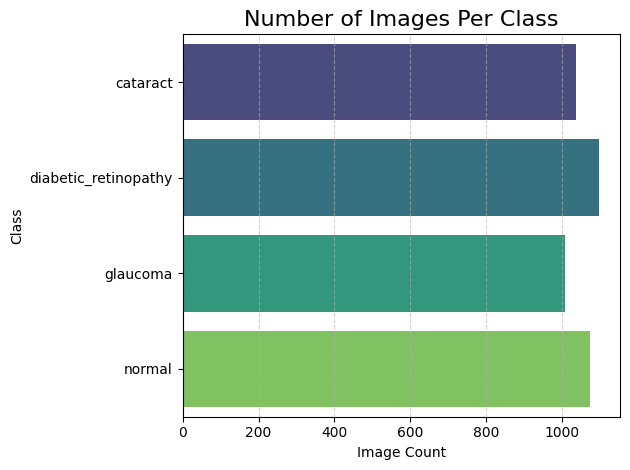

In [8]:
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.Figure(figsize=(10, 6))
sns.barplot(x=counts, y=classes, palette='viridis')

plt.title("Number of Images Per Class", fontsize=16)
plt.xlabel("Image Count")
plt.ylabel("Class")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

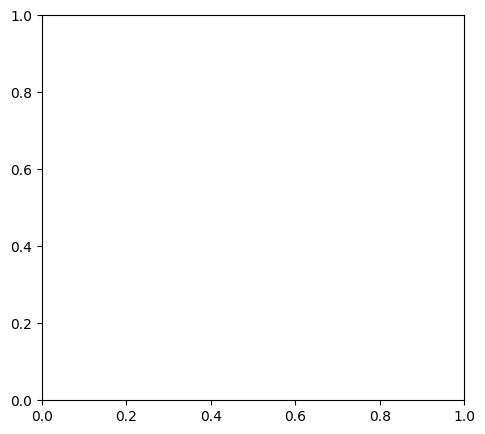

In [9]:
plt.figure(figsize=(12, 5))


# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\optim\lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


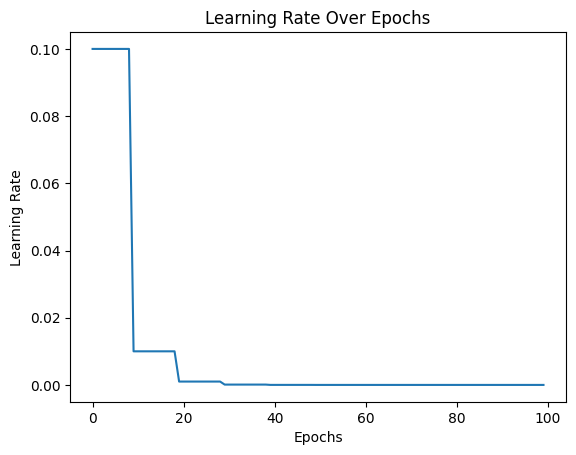

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


model = torch.nn.Linear(10, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)


scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
learning_rates = []


# Simulate training steps
for epoch in range(100):
    scheduler.step()  # Update learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])


plt.plot(learning_rates)
plt.title("Learning Rate Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


# Generate example regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

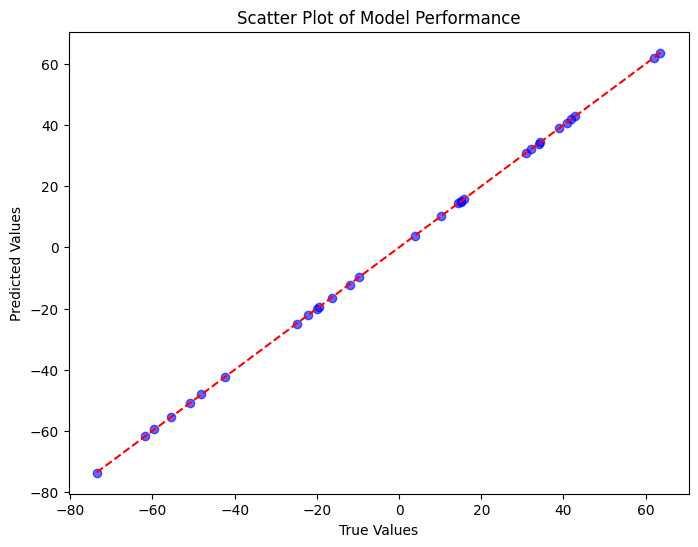

In [11]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)


# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Model Performance')


# Optionally, add a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')


# Show plot
plt.show()

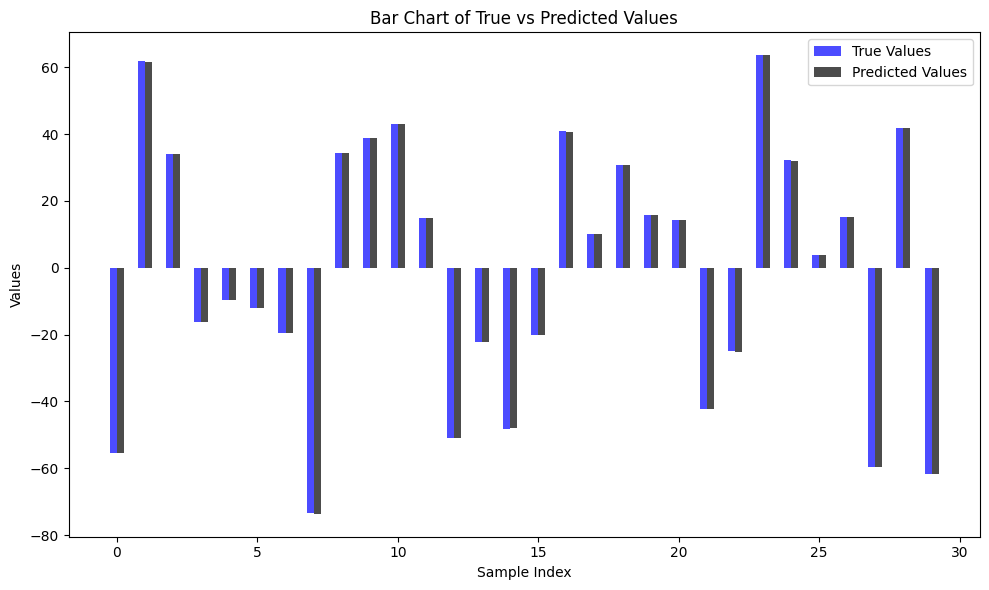

In [12]:
# Number of samples
n_samples = len(y_test)


# Create the bar chart
x = np.arange(n_samples)  # Bar positions on the x-axis
width = 0.25  # Bar width


fig, ax = plt.subplots(figsize=(10, 6))


# Plot bars for true values and predicted values
ax.bar(x - width / 2, y_test, width, label='True Values', color='blue', alpha=0.7)
ax.bar(x + width / 2, y_pred, width, label='Predicted Values', color='black', alpha=0.7)


# Add labels and title
ax.set_xlabel('Sample Index')
ax.set_ylabel('Values')
ax.set_title('Bar Chart of True vs Predicted Values')
ax.legend()


# Show plot
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a classifier (RandomForest in this case)
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8633333333333333
Precision: 0.8904109589041096
Recall: 0.8387096774193549
F1 Score: 0.8637873754152824


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Step 1: Create a synthetic dataset with multiple classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_clusters_per_class=1, random_state=42)


# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 3: Train a classifier (Random Forest Classifier in this case)
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Step 4: Predict on the test set
y_pred = model.predict(X_test)


# Step 5: Evaluate the model performance


# 1. Accuracy - Overall accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


# 2. Precision - Precision for each class (macro average)
precision = precision_score(y_test, y_pred, average='macro')


# 3. Recall - Recall for each class (macro average)
recall = recall_score(y_test, y_pred, average='macro')


# 4. F1 Score - F1 score for each class (macro average)
f1 = f1_score(y_test, y_pred, average='macro')


# 5. Detailed performance report for all classes
report = classification_report(y_test, y_pred, target_names=class_counts)


# Step 6: Print out the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")
print(f"F1 Score (Macro): {f1}")
print("\nClassification Report:\n", report)

Accuracy: 0.7933333333333333
Precision (Macro): 0.8046685389362735
Recall (Macro): 0.7966324680874527
F1 Score (Macro): 0.7980748488439219

Classification Report:
                       precision    recall  f1-score   support

            cataract       0.68      0.83      0.75        76
diabetic_retinopathy       0.78      0.71      0.74        83
            glaucoma       0.89      0.86      0.87        69
              normal       0.86      0.79      0.83        72

            accuracy                           0.79       300
           macro avg       0.80      0.80      0.80       300
        weighted avg       0.80      0.79      0.79       300



(array([0, 1, 2, 3]),
 [Text(0, 0, 'cataract'),
  Text(0, 1, 'diabetic_retinopathy'),
  Text(0, 2, 'glaucoma'),
  Text(0, 3, 'normal')])

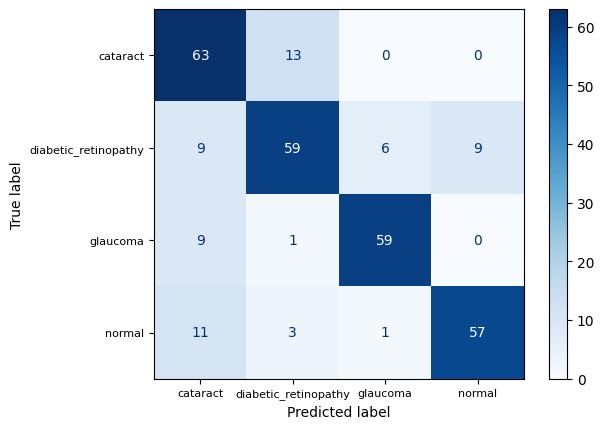

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_counts)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

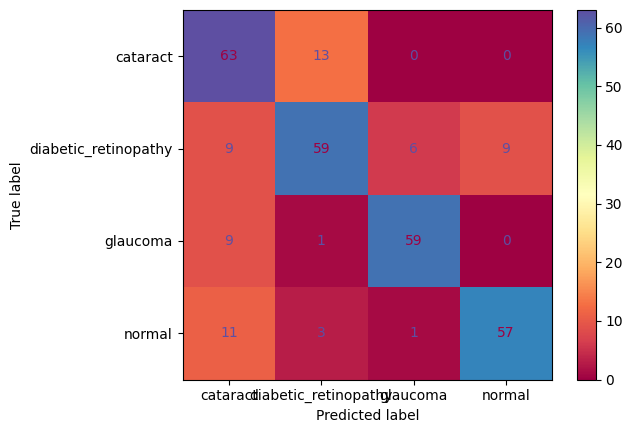

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_counts)
disp.plot(cmap='Spectral', values_format='g')

In [39]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Load Training & Validation Data
img_size = (128, 128)
batch_size = 32

train_data = datagen.flow_from_directory(
    r"C:\Users\HP\Documents\project\dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    r"C:\Users\HP\Documents\project\dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Input

model = Sequential([
    Input(shape=(224, 224, 3)),  # Explicit Input Layer

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),  # Reduces parameters significantly

    Dense(128, activation='relu'),
    Dropout(0.4),  # Reduce overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,748 (1.65 MB)

 Trainable params: 430,788 (1.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [41]:
# Callbacks for training improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

In [42]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Increased for better learning
    callbacks=[early_stopping, reduce_lr]
    )

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.4128 - loss: 1.3333 - val_accuracy: 0.2604 - val_loss: 2.4625 - learning_rate: 0.0010
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.5065 - loss: 1.1289 - val_accuracy: 0.2604 - val_loss: 3.6835 - learning_rate: 0.0010
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5989 - loss: 0.9651 - val_accuracy: 0.2604 - val_loss: 4.1586 - learning_rate: 0.0010
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6388 - loss: 0.8863
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
106/106 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.6389 - loss: 0.8861 - val_accuracy: 0.2913 - val_loss: 2.6587 - learning_rate: 0.0010
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7126 - loss: 0.7368 - val_accuracy: 0.3710 - val_loss: 2.0845 - learning_rate: 5.0000e-04
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7341 - loss: 0

In [ ]:
model.save('eye_disease_model1.keras')